# Notebook Modelisation


1. Equilibrer les classes( smooth)

2. Comparer les modeles avec nos metriques (La sensibilite, accuracy, recall, auc)

3. Estimer le coef optimal pour la classe des risquées (courbe roc, recap semaine derniére)

4. Interpretabilite des modéles, (package shape) contribution des variables 

5. Derniere etape sauvegarder le dernier model avec joblib




https://scikit-learn.org/stable/modules/model_evaluation.html

In [23]:
!pip install imblearn
!pip install shap 
!pip install joblib


You should consider upgrading via the '/home/brandon/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/brandon/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/brandon/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib
# !pip install lightgbm

In [2]:
app_train = pd.read_csv('app_train_cleaned.csv')
app_test = pd.read_csv('app_test_cleaned.csv')

In [3]:
app_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1,0,1,0,1,False,2.007889,0.121978,0.060749,-0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,1,0,0,False,4.790750,0.132217,0.027598,-0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,-0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,-0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,-0.152418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,1,0,1,0,0,False,1.617143,0.174971,0.108198,-0.025303
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,1,0,1,0,0,True,3.743750,0.166687,0.044524,NaN
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,1,0,0,False,4.429176,0.195941,0.044239,-0.529266
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,1,0,1,0,1,False,2.164368,0.118158,0.054592,-0.400134


In [4]:
app_test


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,1,0,1,0,False,4.213333,0.152300,0.036147,0.121044
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,False,2.250182,0.175455,0.077973,0.247398
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,False,3.275378,0.344578,0.105202,0.222477
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,1,0,0,1,0,False,5.000000,0.155614,0.031123,0.133515
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,False,3.475000,0.178150,0.051266,0.168021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0,0,0,0,0,False,3.395556,0.143815,0.042354,0.258838
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,0,0,0,0,0,False,3.951829,0.202600,0.051267,0.102718
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,0,1,0,1,0,False,1.555556,0.163978,0.105414,0.190742
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,1,0,0,1,0,False,2.000000,0.111680,0.055840,0.195518


#

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
import lightgbm as lgb
import gc


from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


# Drop the target from the training data
columnsSupp = ['SK_ID_CURR']

test = app_test.drop( columns = columnsSupp)

if 'TARGET' in app_train:
    columnsSupp.append('TARGET')
    
train = app_train.drop(columns = columnsSupp)

print(train.shape)
print(test.shape)
# Feature names
features = list(train.columns)

# Copy of the testing data

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
# scaler.fit(train)
# train = scaler.transform(train)
# test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
    
    


(307511, 243)
(48744, 243)
Training data shape:  (307511, 243)
Testing data shape:  (48744, 243)


In [38]:
X = train
y = app_train['TARGET'].values

In [39]:
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, y)


In [40]:
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({1: 282686, 0: 282686})


In [41]:

X_train, X_test, y_train, y_test = train_test_split(
     X_res, y_res, test_size=0.33, random_state=42)



# Logistic regression


In [31]:

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import numpy as np


parameters = {
  'C': [0.5],
  'max_iter': [1000]
}

grid_pipeline = GridSearchCV(LogisticRegression(), parameters)
grid_pipeline.fit(X_train, y_train)
print(grid_pipeline.best_params_)


/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

KeyboardInterrupt: 

In [32]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001)

In [33]:
# log_reg_pred = log_reg.predict_proba(test)[:, 1]
log_reg_pred = log_reg.predict(X_test)


# print(app_train.drop('TARGET', axis=1))

In [34]:
# log_reg_pred
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import roc_auc_score

y_true = y_test
y_pred = log_reg_pred

acc = accuracy_score(y_true, y_pred)
roc = roc_auc_score(y_true, y_pred)

print("accurary = " + str(acc))

print(classification_report(y_true, y_pred))
print("roc score " + str(roc))

accurary = 0.6797017789283551
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     93370
           1       0.67      0.69      0.68     93203

    accuracy                           0.68    186573
   macro avg       0.68      0.68      0.68    186573
weighted avg       0.68      0.68      0.68    186573

roc score 0.6797139527525469


In [14]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

[0.         0.33369391 1.        ]
[0.         0.69293907 1.        ]
[2 1 0]


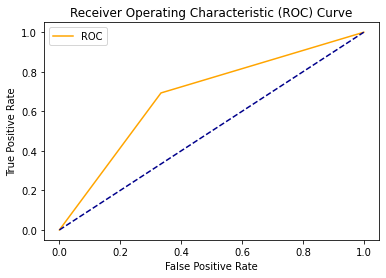

In [15]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
print(fpr)
print(tpr)
print(thresholds)
plot_roc_curve(fpr, tpr)

The Area Under the Curve (AUC) is used to compare classifiers. A perfect classifier will have an area under the ROC curve equal to 1, meanwhile, a perfectly random classifier will have an AUC of 0.5.


# Sauvegarde du modéle 

In [ ]:
filename = 'finalized_model.sav'
joblib.dump(log_reg, filename)

# Random Forest 

In [42]:

from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [43]:

# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.2s finished


Eliminer les variables non-explicatives (SK_ID_CURR)

Si le nombre de variable est toujours important appliquer l'anova par rapport a la variable cible

In [44]:
feature_importances[feature_importances['importance'] <= 0.01]

,feature,importance
0,NAME_CONTRACT_TYPE,0.000571
4,AMT_INCOME_TOTAL,0.005257
5,AMT_CREDIT,0.005586
6,AMT_ANNUITY,0.005721
7,AMT_GOODS_PRICE,0.005070
...,...,...
238,DAYS_EMPLOYED_ANOM,0.007322
239,CREDIT_INCOME_PERCENT,0.005972
240,ANNUITY_INCOME_PERCENT,0.006170
241,CREDIT_TERM,0.005928


In [45]:
acc = accuracy_score(y_true, y_pred_rf)
roc = roc_auc_score(y_true, y_pred_rf)

print("accurary = " + str(acc))

print(classification_report(y_true, y_pred_rf))
print("roc score " + str(roc))

accurary = 0.9558564208111571
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     93370
           1       1.00      0.91      0.95     93203

    accuracy                           0.96    186573
   macro avg       0.96      0.96      0.96    186573
weighted avg       0.96      0.96      0.96    186573

roc score 0.9558168728474405


[0. 0. 1.]
[0.         0.91163375 1.        ]
[2 1 0]


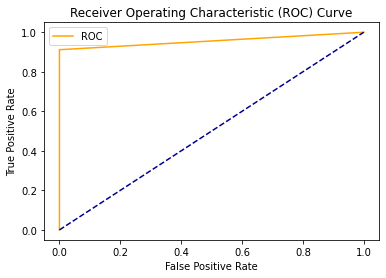

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_rf)
print(fpr)
print(tpr)
print(thresholds)
plot_roc_curve(fpr, tpr)